In [3]:
%ls
%cd ..

In [103]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [106]:
def plot_result(model, data, norm):
    path = os.path.join("results", f"{model}_{data}_normalization_{norm}")
    print(os.listdir(path))
    
    # offline
    print("== offline ==")
    offlines = []
    for file in os.listdir(path):
        if "offline" in file and "wSR" not in file:
            df = pd.read_csv(os.path.join(path, file), index_col=0)
            offlines.append(df)
    offlines = pd.concat(offlines)
    qBest = offlines[offlines.index == "Qbest"]["F1"].values[0]
    
    index = offlines.index
    is_duplicate = index.duplicated(keep="first")
    not_duplicate = ~is_duplicate
    offlines = offlines[not_duplicate]
    offlines = offlines.drop("Qbest")
    offlines = offlines.rename(dict(zip(offlines.index, list(map(lambda x: float(x.replace("Q", "")), list(offlines.index))))))
    offlines = offlines.sort_index()
    print(offlines["F1"])
    
    # offline + SR
    print("== offline ==")
    offlines_wSR = []
    for file in os.listdir(path):
        if "offline" in file and "wSR" in file:
            df = pd.read_csv(os.path.join(path, file), index_col=0)
            offlines_wSR.append(df)
    offlines_wSR = pd.concat(offlines_wSR)
    
    index = offlines_wSR.index
    is_duplicate = index.duplicated(keep="first")
    not_duplicate = ~is_duplicate
    offlines_wSR = offlines_wSR[not_duplicate]
    offlines_wSR = offlines_wSR.rename(dict(zip(offlines_wSR.index, list(map(lambda x: float(x.replace("Q", "")), list(offlines_wSR.index))))))
    offlines_wSR = offlines_wSR.sort_index()
    print(offlines_wSR["F1"])
    
    # online
    print("== online ==")
    onlines = []
    for file in os.listdir(path):
        if "online" in file:
            df = pd.read_csv(os.path.join(path, file), index_col=0)
            onlines.append(df)
    onlines = pd.concat(onlines)
    
    index = onlines.index
    is_duplicate = index.duplicated(keep="first")
    not_duplicate = ~is_duplicate
    onlines = onlines[not_duplicate]
    onlines = onlines.rename(dict(zip(onlines.index, list(map(lambda x: float(x.replace("Q", "")), list(onlines.index))))))
    onlines = onlines.sort_index()
    print(onlines["F1"])
    
    # plot
    plt.title(f"{data}")
    plt.scatter(offlines["F1"].index, offlines["F1"].values, label="offline")
    plt.scatter(offlines_wSR["F1"].index, offlines_wSR["F1"].values, label="offline_wSR")
    plt.scatter(onlines["F1"].index, onlines["F1"].values, label="online")
    plt.axhline(qBest, color="black", label="offline threshold with test data")
    plt.legend()
    plt.show()

['MLP_SWaT_normalization_SlowRevIN_offline_0.999_1.0_0.0001.csv', 'MLP_SWaT_normalization_SlowRevIN_offline_0.99_1.0_0.001.csv', 'MLP_SWaT_normalization_SlowRevIN_offline_0.9_1.0_0.01.csv', 'MLP_SWaT_normalization_SlowRevIN_offline_wSR_0.999_1.0_0.0001.csv', 'MLP_SWaT_normalization_SlowRevIN_offline_wSR_0.99_1.0_0.001.csv', 'MLP_SWaT_normalization_SlowRevIN_offline_wSR_0.9_1.0_0.01.csv', 'MLP_SWaT_normalization_SlowRevIN_online_0.999_1.0_0.0001.csv', 'MLP_SWaT_normalization_SlowRevIN_online_0.99_1.0_0.001.csv', 'MLP_SWaT_normalization_SlowRevIN_online_0.9_1.0_0.01.csv']
== offline ==
90.00     0.219087
91.00     0.220784
92.00     0.223102
93.00     0.226407
94.00     0.231399
95.00     0.238311
96.00     0.247340
97.00     0.251295
98.00     0.255594
99.00     0.257342
99.10     0.257131
99.20     0.256624
99.30     0.255972
99.40     0.255327
99.50     0.255124
99.60     0.255827
99.70     0.257651
99.80     0.257779
99.90     0.268019
99.91     0.270304
99.92     0.272586
99.93     

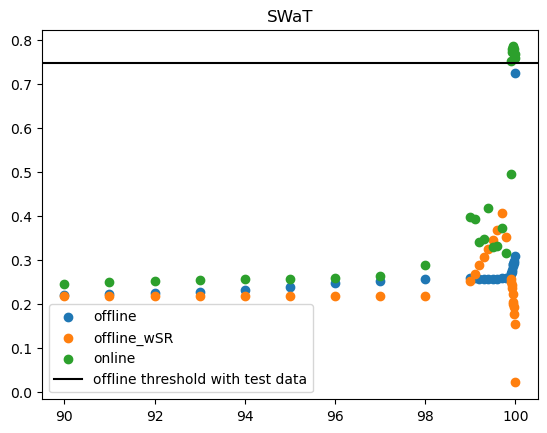

['MLP_WADI_normalization_SlowRevIN_offline_0.95_1.0_0.001.csv', 'MLP_WADI_normalization_SlowRevIN_offline_0.9_1.0_0.01.csv', 'MLP_WADI_normalization_SlowRevIN_offline_wSR_0.95_1.0_0.001.csv', 'MLP_WADI_normalization_SlowRevIN_offline_wSR_0.9_1.0_0.01.csv', 'MLP_WADI_normalization_SlowRevIN_online_0.95_1.0_0.001.csv', 'MLP_WADI_normalization_SlowRevIN_online_0.9_1.0_0.01.csv']
== offline ==
90.0     0.120644
91.0     0.123104
92.0     0.125789
93.0     0.128557
94.0     0.130802
95.0     0.135493
95.1     0.135932
95.2     0.136172
95.3     0.136427
95.4     0.136591
95.5     0.136547
95.6     0.136404
95.7     0.136398
95.8     0.136397
95.9     0.136276
96.0     0.136211
96.1     0.136057
96.2     0.135962
96.3     0.135792
96.4     0.135610
96.5     0.135361
96.6     0.134589
96.7     0.133653
96.8     0.132873
96.9     0.131934
97.0     0.130270
97.1     0.127988
97.2     0.125817
97.3     0.123840
97.4     0.122679
97.5     0.121737
97.6     0.121025
97.7     0.120542
97.8     0.12

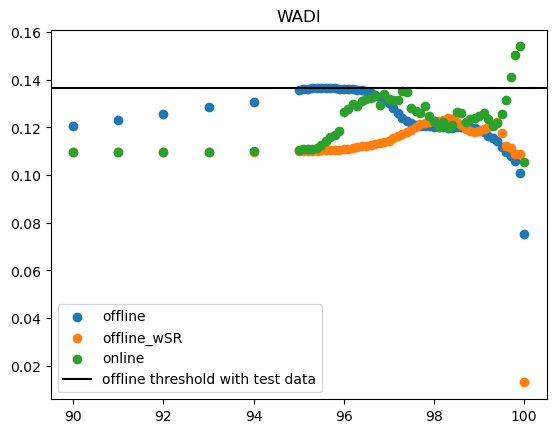

['MLP_PSM_normalization_SlowRevIN_offline_0.9_1.0_0.01.csv', 'MLP_PSM_normalization_SlowRevIN_offline_wSR_0.9_1.0_0.01.csv', 'MLP_PSM_normalization_SlowRevIN_online_0.9_1.0_0.01.csv']
== offline ==
90.0     0.509265
91.0     0.511435
92.0     0.512844
93.0     0.515013
94.0     0.518984
95.0     0.523186
96.0     0.528947
97.0     0.527803
98.0     0.507704
99.0     0.361627
100.0    0.000082
Name: F1, dtype: float64
== offline ==
90.0     0.321189
91.0     0.304939
92.0     0.285385
93.0     0.263142
94.0     0.236496
95.0     0.203978
96.0     0.168315
97.0     0.135328
98.0     0.102490
99.0     0.068563
100.0    0.000082
Name: F1, dtype: float64
== online ==
90.0     0.522665
91.0     0.525232
92.0     0.530079
93.0     0.535176
94.0     0.541672
95.0     0.548121
96.0     0.546603
97.0     0.516078
98.0     0.391692
99.0     0.161010
100.0    0.000082
Name: F1, dtype: float64


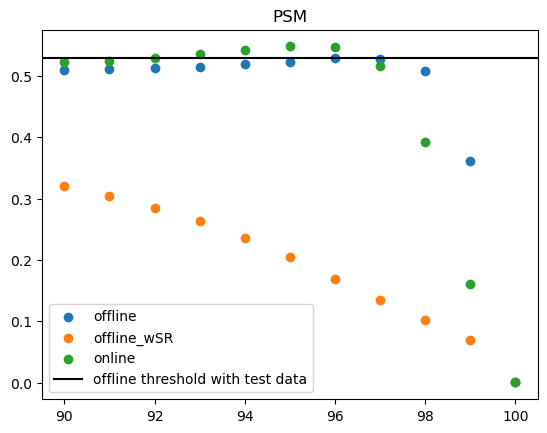

['MLP_Pump_normalization_SlowRevIN_offline_0.99_1.0_0.001.csv', 'MLP_Pump_normalization_SlowRevIN_offline_0.9_1.0_0.01.csv', 'MLP_Pump_normalization_SlowRevIN_offline_wSR_0.99_1.0_0.001.csv', 'MLP_Pump_normalization_SlowRevIN_offline_wSR_0.9_1.0_0.01.csv', 'MLP_Pump_normalization_SlowRevIN_online_0.99_1.0_0.001.csv', 'MLP_Pump_normalization_SlowRevIN_online_0.9_1.0_0.01.csv']
== offline ==
90.0     0.145218
91.0     0.146112
92.0     0.147621
93.0     0.150283
94.0     0.154999
95.0     0.163854
96.0     0.179957
97.0     0.207355
98.0     0.279653
99.0     0.441762
99.1     0.462194
99.2     0.480368
99.3     0.499853
99.4     0.513792
99.5     0.517675
99.6     0.476345
99.7     0.406993
99.8     0.415659
99.9     0.648983
100.0    0.001644
Name: F1, dtype: float64
== offline ==
90.0     0.144733
91.0     0.145308
92.0     0.146200
93.0     0.147590
94.0     0.149838
95.0     0.154535
96.0     0.166784
97.0     0.205827
98.0     0.316528
99.0     0.548974
99.1     0.574165
99.2     0

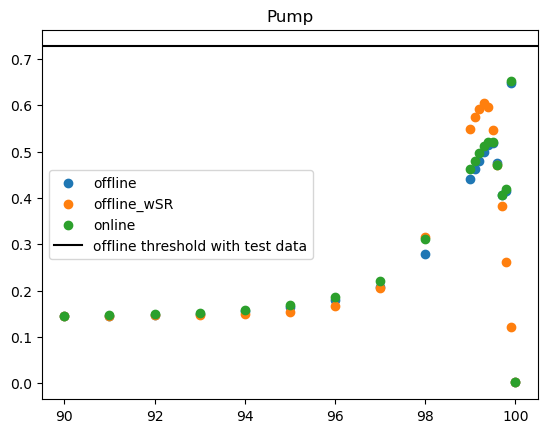

['MLP_CreditCard_normalization_SlowRevIN_offline_0.99_1.0_0.001.csv', 'MLP_CreditCard_normalization_SlowRevIN_offline_0.9_1.0_0.01.csv', 'MLP_CreditCard_normalization_SlowRevIN_offline_wSR_0.9_1.0_0.01.csv', 'MLP_CreditCard_normalization_SlowRevIN_online_0.99_1.0_0.001.csv', 'MLP_CreditCard_normalization_SlowRevIN_online_0.9_1.0_0.01.csv', 'MLP_CreditCard_normalization_SlowRevIN_online_0.9_1.0_0.1.csv']
== offline ==
90.0     0.010059
91.0     0.010843
92.0     0.011805
93.0     0.013307
94.0     0.015628
95.0     0.019431
96.0     0.026412
97.0     0.039966
98.0     0.057228
99.0     0.091129
99.1     0.095153
99.2     0.100840
99.3     0.107466
99.4     0.109426
99.5     0.122449
99.6     0.124535
99.7     0.107922
99.8     0.081514
99.9     0.073913
100.0    0.000000
Name: F1, dtype: float64
== offline ==
90.0     0.011498
91.0     0.012533
92.0     0.014027
93.0     0.015668
94.0     0.018362
95.0     0.022286
96.0     0.029647
97.0     0.042640
98.0     0.058482
99.0     0.089934


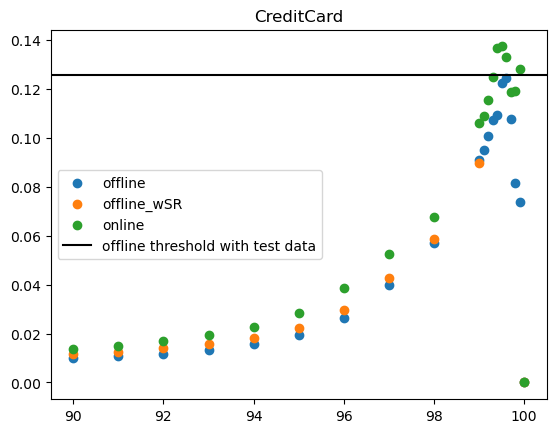

In [107]:
model = "MLP"
data = ["SWaT", "WADI", "PSM", "Pump", "CreditCard"]
norm = "SlowRevIN"
for d in data:
    plot_result(model, d, norm)